In [1]:
import numpy as np
import cv2

# Load an color image in grayscale
img = cv2.imread('pics/Tensorboard_01.png',0)

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

ModuleNotFoundError: No module named 'cv2'

In [4]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()


In [2]:
cv2.destroyAllWindows()

In [16]:
cap.isOpened()

False

In [13]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)
print(cap.get(3))
print(cap.get(4))

#ret = cap.set(3,320)
#ret = cap.set(4,240)

#print(cap.get(3))
#print(cap.get(4))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (1280,1024))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.flip(frame,0)

        # write the flipped frame
        out.write(frame)

        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

1280.0
1024.0


In [21]:
import numpy as np
import cv2

# Create a black image
img = np.zeros((512,512,3), np.uint8)

# Draw a diagonal blue line with thickness of 5 px
img = cv2.line(img,(0,0),(511,511),(255,0,0),5)
img = cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)
img = cv2.circle(img,(447,63), 63, (0,0,255), -1)
img = cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)

pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,[pts],True,(0,255,255))

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
import cv2
events = [i for i in dir(cv2) if 'EVENT' in i]
print(events)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


In [33]:
import cv2
import numpy as np

print(cv2.EVENT_LBUTTONDBLCLK)
print(cv2.EVENT_LBUTTONDOWN)

# mouse callback function
def draw_circle(event,x,y,flags,param):
    
    #print(event)
          
    if event == cv2.EVENT_LBUTTONDOWN:
        print('X: {}'.format(x))
        print('Y: {}'.format(y))
        cv2.circle(img,(x,y),100,(255,0,0),-1)

# Create a black image, a window and bind the function to window
img = np.zeros((1024,1024,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

7
1
X: 838
Y: 590
X: 549
Y: 185
X: 339
Y: 575
X: 190
Y: 786
X: 710
Y: 859
X: 246
Y: 205
X: 468
Y: 467
X: 752
Y: 222
X: 596
Y: 546


# More Advanced Demo

Now we go for much more better application. 
In this, we draw either rectangles or circles 
(depending on the mode we select) by dragging the mouse 
like we do in Paint application. 
So our mouse callback function has two parts, 
one to draw rectangle and other to draw the circles. 
This specific example will be really helpful in creating 
and understanding some interactive applications like object tracking, 
image segmentation etc.

In [36]:
import cv2
import numpy as np

drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break

cv2.destroyAllWindows()

KeyboardInterrupt: 

In [37]:
import cv2
import numpy as np

def nothing(x):
    pass

# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

    # get current positions of four trackbars
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    s = cv2.getTrackbarPos(switch,'image')

    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]

cv2.destroyAllWindows()

In [4]:
import numpy as np
import cv2

img = cv2.imread('pics/Tensorboard_01.png',0)
px = img[100,100]
print(px)
print(img)
print(img.shape)
print(img.size)


#img[100:200,50:150] = 0
graph1 = img[80:220,40:200]
img[240:380,40:200] = graph1

cv2.imshow('image',img)
#cv2.waitKey(0)
cv2.destroyAllWindows()

156
[[242 242 242 ... 242 242 242]
 [250 250 250 ... 250 250 250]
 [255 255 255 ... 255 255 255]
 ...
 [222 255 255 ... 255 255 255]
 [222 255 255 ... 255 255 255]
 [222 255 255 ... 255 255 255]]
(570, 337)
192090


In [ ]:
print(test)

/Users/minority/Code/Git/nnw


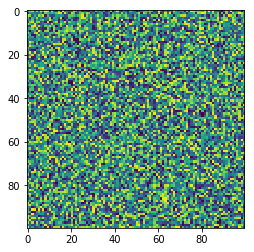

In [8]:
import os
from numpy import random
import math
cwd = os.getcwd()
print(cwd)
import SimpleITK as sitk

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from myshow import myshow, myshow3d

#from ipywidgets import interact, fixed
import os

import SimpleITK


plt.imshow(random.rand(100, 100), interpolation='nearest')
plt.show()
